# Pre-processing Utah Allocation data for WaDE upload.
- Purpose:  To pre-process the Utah data into one master file for simple DataFrame creation and extraction

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # plotting library

# ---- API data retrieval ----
import requests  # http requests
import json  # JSON parse

# ---- Cleanup ----
import re  # string regular expression manipulation
from datetime import datetime  # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = "G:/Shared drives/WaDE Data/WaDE Data Folder/Utah/WaterAllocation" # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: G:/Shared drives/WaDE Data/WaDE Data Folder/Utah/WaterAllocation


## Point of Diversion Data

In [3]:
# Input File
FI_PoD = "RawInputData/Utah_Points_of_Diversion.zip"
#dfinPOD = pd.read_csv(FI_PoD, encoding = "ISO-8859-1").replace(np.nan, "")
dfinPOD = pd.read_csv(FI_PoD).replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfinPOD:
    dfinPOD['WaDEUUID'] = "utD" + dfinPOD.index.astype(str)
    dfinPOD.to_csv('RawInputData/Utah_Points_of_Diversion.zip', compression=dict(method='zip', archive_name='Utah_Points_of_Diversion.csv'), index=False)

print(len(dfinPOD))
dfinPOD.head()

396013


,ï»¿OBJECTID,WRNUM,CHEXNUM,TYPE,SUMMARY_ST,STATUS,PRIORITY,USES,CFS,ACFT,LOCATION,WIN,OWNER,SOURCE,WebLink,NodeId,Longitude,Latitude,GlobalID,WaDEUUID
0,1042769722,0009002M00,,Underground,A,APPLAPP,,,0.00000,0.00000,S2800 E1125 NW 26 36S 22E SL,23178,STANTEC CONSULTING INC.,Non-Production Well Unknown,https://www.waterrights.utah.gov/search/?q=000...,0,-109.47214,37.62765,cf6bc5fe-9396-40d9-a776-5ee752f1784c,utD0
1,1042769723,0009002P00,,Underground,A,APPLAPP,,,0.00000,0.00000,S650 W300 NE 12 34S 24E SL,22653,ELDRED MIKE,Non-Production WellTest,https://www.waterrights.utah.gov/search/?q=000...,0,-109.22851,37.84186,62432655-c664-481a-b193-79a0772c6c48,utD1
2,1042769724,25-9321,,Underground,P,APPLCERT,19930520,DI,0.01500,1.40200,S820 W5 N4 01 10N 1W SL,28325,SCOTT LEISHMAN,Underground Water Well,https://www.waterrights.utah.gov/search/?q=25-...,0,-111.90056,41.63915,97f76bae-b752-4ac0-9549-2060079cee5d,utD2
3,1042769725,25-4925,a10317,Underground,T,APPLLAP,19780728,DIOS,2.00000,0.00000,N1850 E1880 SW 11 14N 1E SL,0,ENOCH CITY CORPORATION,Underground Water Well,https://www.waterrights.utah.gov/search/?q=a10317,0,-111.81051,41.96669,46c9b68b-5c62-495b-a542-0bbe8a86d51d,utD3
4,1042769726,61-2748,a34054,Rediversion,T,APPLAMEN,20080221,DIS,0.12900,20.00000,N740 E185 SW 26 34S 3W SL,0,COTTONWOOD LEDGES LAND CO LLC,Tom Best Spring,https://www.waterrights.utah.gov/search/?q=a34054,0,-112.09399,37.81394,a9805517-effb-4959-aeaa-e1fffd0343ee,utD4


In [4]:
# We don't want to use any CHEXNUM data
dfinPOD['CHEXNUM'] = dfinPOD['CHEXNUM'].str.strip()
dfinPOD = dfinPOD[dfinPOD['CHEXNUM'] == ""].reset_index(drop=True)
print(len(dfinPOD))
dfinPOD.head()

289054


,ï»¿OBJECTID,WRNUM,CHEXNUM,TYPE,SUMMARY_ST,STATUS,PRIORITY,USES,CFS,ACFT,LOCATION,WIN,OWNER,SOURCE,WebLink,NodeId,Longitude,Latitude,GlobalID,WaDEUUID
0,1042769722,0009002M00,,Underground,A,APPLAPP,,,0.00000,0.00000,S2800 E1125 NW 26 36S 22E SL,23178,STANTEC CONSULTING INC.,Non-Production Well Unknown,https://www.waterrights.utah.gov/search/?q=000...,0,-109.47214,37.62765,cf6bc5fe-9396-40d9-a776-5ee752f1784c,utD0
1,1042769723,0009002P00,,Underground,A,APPLAPP,,,0.00000,0.00000,S650 W300 NE 12 34S 24E SL,22653,ELDRED MIKE,Non-Production WellTest,https://www.waterrights.utah.gov/search/?q=000...,0,-109.22851,37.84186,62432655-c664-481a-b193-79a0772c6c48,utD1
2,1042769724,25-9321,,Underground,P,APPLCERT,19930520,DI,0.01500,1.40200,S820 W5 N4 01 10N 1W SL,28325,SCOTT LEISHMAN,Underground Water Well,https://www.waterrights.utah.gov/search/?q=25-...,0,-111.90056,41.63915,97f76bae-b752-4ac0-9549-2060079cee5d,utD2
3,1042769727,0009003P00,,Underground,A,APPLAPP,,,0.00000,0.00000,S120 E500 NW 05 36S 26E SL,21983,ROGERS JARRED W. AND NORMA L.,Non-Production WellTest,https://www.waterrights.utah.gov/search/?q=000...,0,-109.09374,37.68382,44403522-b1a4-4bef-9d39-47ba041e2e69,utD5
4,1042769728,0015001M00,,Underground,A,APPLAPP,,,0.00000,0.00000,N940 E560 SE 18 1S 19W SL,21431,TOM JONES,Non-Production Well Unknown,https://www.waterrights.utah.gov/search/?q=001...,0,-114.03529,40.73587,c1f7328a-cd6c-4d72-be47-b8745b1175ac,utD6


In [5]:
# For creating BeneficialUseCategory
benUseDict = {
    "I" : "Irrigation",
    "S" : "Stockwatering",
    "D" : "Domestic",
    "M" : "Municipal",
    "X" : "Mining",
    "P" : "Power",
    "O" : "Other"}
def assignBenUseCategory(colrowValue):
    colrowValue = str(colrowValue).strip()
    if colrowValue == "" or pd.isnull(colrowValue):
        outList = ""
    else:
        outList = ",".join(benUseDict[inx] for inx in list(str(colrowValue)))
    return outList


dfinPOD['in_BeneficialUseCategory'] = dfinPOD.apply(lambda row: assignBenUseCategory(row['USES']), axis=1)
dfinPOD['in_BeneficialUseCategory'].unique()

array(['', 'Domestic,Irrigation', 'Other,Stockwatering',
       'Irrigation,Stockwatering', 'Irrigation', 'Stockwatering',
       'Domestic,Irrigation,Stockwatering', 'Domestic,Stockwatering',
       'Municipal', 'Domestic', 'Irrigation,Municipal', 'Domestic,Mining',
       'Domestic,Other', 'Irrigation,Other', 'Other', 'Power', 'Mining',
       'Irrigation,Other,Stockwatering', 'Domestic,Other,Stockwatering',
       'Domestic,Irrigation,Municipal,Other,Stockwatering',
       'Domestic,Irrigation,Other,Stockwatering',
       'Domestic,Irrigation,Municipal,Stockwatering',
       'Domestic,Irrigation,Other', 'Municipal,Other,Power',
       'Domestic,Irrigation,Stockwatering,Power,Mining',
       'Irrigation,Municipal,Stockwatering', 'Municipal,Stockwatering',
       'Irrigation,Stockwatering,Power', 'Domestic,Irrigation,Municipal',
       'Stockwatering,Mining', 'Domestic,Municipal',
       'Domestic,Irrigation,Municipal,Other', 'Other,Power',
       'Municipal,Other', 'Municipal,Stockwa

In [6]:
# create output POD dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfinPOD['WaDEUUID']

# Method Info
df['in_MethodUUID'] = "UTwr_M1"

# Variable Info
df['in_VariableSpecificUUID'] = "UTwr_V1"

# Organization Info
df['in_OrganizationUUID'] = "UTwr_O1"

# WaterSource Info
df['in_Geometry'] = ""
df['in_GNISFeatureNameCV'] = ""
df['in_WaterQualityIndicatorCV'] = ""
df['in_WaterSourceName'] = dfinPOD['SOURCE']
df['in_WaterSourceNativeID'] = "" #auto fill in below
df['in_WaterSourceTypeCV'] = dfinPOD['TYPE']

# Site Info
df['in_CoordinateAccuracy'] = ""
df['in_CoordinateMethodCV'] = ""
df['in_County'] = ""
df['in_EPSGCodeCV'] = 4326
df['in_Geometry'] = ""
df['in_GNISCodeCV'] = ""
df['in_HUC12'] = ""
df['in_HUC8'] = ""
df['in_Latitude'] = dfinPOD['Latitude']
df['in_Longitude'] = dfinPOD['Longitude']
df['in_NHDNetworkStatusCV'] = ""
df['in_NHDProductCV'] = ""
df['in_PODorPOUSite'] = "POD"
df['in_SiteName'] = dfinPOD['SOURCE']
df['in_SiteNativeID'] = "d" + dfinPOD['ï»¿OBJECTID'].replace("", 0).fillna(0).astype(int).astype(str)
df['in_SitePoint'] = ""
df['in_SiteTypeCV'] = ""
df['in_StateCV'] = "UT"
df['in_USGSSiteID'] = ""

# AllocationAmount Info
df['in_AllocationApplicationDate'] = ""
df['in_AllocationAssociatedConsumptiveUseSiteIDs'] = ""
df['in_AllocationAssociatedWithdrawalSiteIDs'] = ""
df['in_AllocationBasisCV'] = ""
df['in_AllocationChangeApplicationIndicator'] = ""
df['in_AllocationCommunityWaterSupplySystem'] = ""
df['in_AllocationCropDutyAmount'] = ""
df['in_AllocationExpirationDate'] = ""
df['in_AllocationFlow_CFS'] = dfinPOD['CFS'].astype(float)
df['in_AllocationLegalStatusCV'] = dfinPOD['STATUS']
df['in_AllocationNativeID'] =  dfinPOD['WRNUM'].replace("", 0).fillna(0).astype(str)
df['in_AllocationOwner'] = dfinPOD['OWNER']
df['in_AllocationPriorityDate'] = dfinPOD['PRIORITY']
df['in_AllocationSDWISIdentifierCV'] = ""
df['in_AllocationTimeframeEnd'] = ""
df['in_AllocationTimeframeStart'] = ""
df['in_AllocationTypeCV'] = ""
df['in_AllocationVolume_AF'] = dfinPOD['ACFT']
df['in_BeneficialUseCategory'] = dfinPOD['in_BeneficialUseCategory']
df['in_CommunityWaterSupplySystem'] = ""
df['in_CropTypeCV'] = ""
df['in_CustomerTypeCV'] = ""
df['in_DataPublicationDate'] = ""
df['in_DataPublicationDOI'] = ""
df['in_ExemptOfVolumeFlowPriority'] = 0
df['in_GeneratedPowerCapacityMW'] = ""
df['in_IrrigatedAcreage'] = ""
df['in_IrrigationMethodCV'] = ""
df['in_LegacyAllocationIDs'] = ""
df['in_OwnerClassificationCV'] = ""
df['in_PopulationServed'] = ""
df['in_PowerType'] = ""
df['in_PrimaryBeneficialUseCategory'] = ""
df['in_SDWISIdentifierCV'] = ""
df['in_WaterAllocationNativeURL'] = dfinPOD['WebLink']

outPOD = df.copy()
outPOD = outPOD.drop_duplicates().reset_index(drop=True)
print(len(outPOD))
outPOD.head()

289054


,WaDEUUID,in_MethodUUID,in_VariableSpecificUUID,in_OrganizationUUID,in_Geometry,in_GNISFeatureNameCV,in_WaterQualityIndicatorCV,in_WaterSourceName,in_WaterSourceNativeID,in_WaterSourceTypeCV,in_CoordinateAccuracy,in_CoordinateMethodCV,in_County,in_EPSGCodeCV,in_GNISCodeCV,in_HUC12,in_HUC8,in_Latitude,in_Longitude,in_NHDNetworkStatusCV,in_NHDProductCV,in_PODorPOUSite,in_SiteName,in_SiteNativeID,in_SitePoint,in_SiteTypeCV,in_StateCV,in_USGSSiteID,in_AllocationApplicationDate,in_AllocationAssociatedConsumptiveUseSiteIDs,in_AllocationAssociatedWithdrawalSiteIDs,in_AllocationBasisCV,in_AllocationChangeApplicationIndicator,in_AllocationCommunityWaterSupplySystem,in_AllocationCropDutyAmount,in_AllocationExpirationDate,in_AllocationFlow_CFS,in_AllocationLegalStatusCV,in_AllocationNativeID,in_AllocationOwner,in_AllocationPriorityDate,in_AllocationSDWISIdentifierCV,in_AllocationTimeframeEnd,in_AllocationTimeframeStart,in_AllocationTypeCV,in_AllocationVolume_AF,in_BeneficialUseCategory,in_CommunityWaterSupplySystem,in_CropTypeCV,in_CustomerTypeCV,in_DataPublicationDate,in_DataPublicationDOI,in_ExemptOfVolumeFlowPriority,in_GeneratedPowerCapacityMW,in_IrrigatedAcreage,in_IrrigationMethodCV,in_LegacyAllocationIDs,in_OwnerClassificationCV,in_PopulationServed,in_PowerType,in_PrimaryBeneficialUseCategory,in_SDWISIdentifierCV,in_WaterAllocationNativeURL
0,utD0,UTwr_M1,UTwr_V1,UTwr_O1,,,,Non-Production Well Unknown,,Underground,,,,4326,,,,37.62765,-109.47214,,,POD,Non-Production Well Unknown,d1042769722,,,UT,,,,,,,,,,0.00000,APPLAPP,0009002M00,STANTEC CONSULTING INC.,,,,,,0.00000,,,,,,,0,,,,,,,,,,https://www.waterrights.utah.gov/search/?q=000...
1,utD1,UTwr_M1,UTwr_V1,UTwr_O1,,,,Non-Production WellTest,,Underground,,,,4326,,,,37.84186,-109.22851,,,POD,Non-Production WellTest,d1042769723,,,UT,,,,,,,,,,0.00000,APPLAPP,0009002P00,ELDRED MIKE,,,,,,0.00000,,,,,,,0,,,,,,,,,,https://www.waterrights.utah.gov/search/?q=000...
2,utD2,UTwr_M1,UTwr_V1,UTwr_O1,,,,Underground Water Well,,Underground,,,,4326,,,,41.63915,-111.90056,,,POD,Underground Water Well,d1042769724,,,UT,,,,,,,,,,0.01500,APPLCERT,25-9321,SCOTT LEISHMAN,19930520,,,,,1.40200,"Domestic,Irrigation",,,,,,0,,,,,,,,,,https://www.waterrights.utah.gov/search/?q=25-...
3,utD5,UTwr_M1,UTwr_V1,UTwr_O1,,,,Non-Production WellTest,,Underground,,,,4326,,,,37.68382,-109.09374,,,POD,Non-Production WellTest,d1042769727,,,UT,,,,,,,,,,0.00000,APPLAPP,0009003P00,ROGERS JARRED W. AND NORMA L.,,,,,,0.00000,,,,,,,0,,,,,,,,,,https://www.waterrights.utah.gov/search/?q=000...
4,utD6,UTwr_M1,UTwr_V1,UTwr_O1,,,,Non-Production Well Unknown,,Underground,,,,4326,,,,40.73587,-114.03529,,,POD,Non-Production Well Unknown,d1042769728,,,UT,,,,,,,,,,0.00000,APPLAPP,0015001M00,TOM JONES,,,,,,0.00000,,,,,,,0,,,,,,,,,,https://www.waterrights.utah.gov/search/?q=001...


## Place of Use Data

In [7]:
# Input File
inputFile = "RawInputData/shapefiles/Utah_Place_of_Use_Irrigation.zip"
dfinPOU = gpd.read_file(inputFile).replace(np.nan, "")
dfinPOU['geometry'] = dfinPOU['geometry'].to_crs(epsg=4326) # Realign Geometry Projection

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfinPOU:
    dfinPOU['WaDEUUID'] = "u" + dfinPOU.index.astype(str)
    dfinPOU.to_csv('RawInputData/Utah_Place_of_Use_Irrigation.zip', compression=dict(method='zip', archive_name='Utah_Place_of_Use_Irrigation.csv'), index=False)

#UT specific 
dfinPOU['WRNUMS'] = dfinPOU['WRNUMS'].replace(" ", "").str.strip().astype(str)
dfinPOU = dfinPOU.drop_duplicates().reset_index(drop=True)

print(len(dfinPOU))
dfinPOU.head()

70943


,RECORD_ID,GROUP_NUMB,AREA_CODE,CHNUM,POLYGON_AC,POU_TYPE,DOCUMENT_A,DOC_ID,DOC_PAGE,SOURCE,URL,ACRES,WRNUMS,dbURL,recordID,Shape__Are,Shape__Len,cent_Latit,cent_Longi,Shape_Leng,Shape_Area,geometry,WaDEUUID
0,71165326,85,01,,,,,,,ProofMap,https://waterrights.utah.gov/adjdinfo/hydromap...,0.00000,01-1127,https://maps.waterrights.utah.gov/POUPolygons/...,1,17.43164,31.16859,38.65522,-109.67395,0.00031,0.00000,"POLYGON ((-109.67401 38.65519, -109.67402 38.6...",u0
1,71165327,82,01,,,,,,,ProofMap,https://waterrights.utah.gov/adjdinfo/hydromap...,0.00000,"01-1078, 01-1124",https://maps.waterrights.utah.gov/POUPolygons/...,3,76631.45801,2248.41702,38.65817,-109.68494,0.02335,0.00001,"MULTIPOLYGON (((-109.68702 38.65724, -109.687 ...",u1
2,71165328,80,01,,,,,,,ProofMap,https://waterrights.utah.gov/adjdinfo/hydromap...,0.00000,01-1122,https://maps.waterrights.utah.gov/POUPolygons/...,4,1998.11963,212.27895,38.84946,-109.28307,0.00226,0.00000,"POLYGON ((-109.28259 38.84929, -109.28329 38.8...",u2
3,71165329,627071,01,,,,,,,ProofMap,https://waterrights.utah.gov/adjdinfo/hydromap...,0.00000,01-1169,https://maps.waterrights.utah.gov/POUPolygons/...,5,676.93848,433.03334,39.07298,-109.13151,0.00405,0.00000,"MULTIPOLYGON (((-109.13127 39.07287, -109.1312...",u3
4,71165330,63,01,,,,,,,ProofMap,https://waterrights.utah.gov/adjdinfo/hydromap...,0.45443,01-1106,https://maps.waterrights.utah.gov/POUPolygons/...,28,1838.14722,411.68113,38.67979,-109.68728,0.00469,0.00000,"POLYGON ((-109.6884 38.67975, -109.6884 38.679...",u4


In [8]:
# Need to split out WRNUMS into their own row
# The explode() method explodes lists into separate rows.
dfinPOU = dfinPOU.assign(WRNUMS=dfinPOU['WRNUMS'].str.split(',')).explode('WRNUMS').reset_index()
dfinPOU = dfinPOU.rename({'WRNUMS': 'WRNUM'}, axis=1)
dfinPOU['WRNUM'] = dfinPOU['WRNUM'].str.strip().replace("", 0).fillna(0).astype(str)
dfinPOU = dfinPOU.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
dfinPOU['WRNUM'].unique()

array(['01-1127', '01-1078', '01-1124', ..., '91-2755', '91-2756',
       '91-2757'], dtype=object)

In [9]:
# tie POD data to POU data for correct watersource info
dfinPOU = pd.merge(dfinPOU, outPOD[['in_AllocationNativeID', 'in_WaterSourceTypeCV', 'in_WaterSourceName']], left_on='WRNUM', right_on='in_AllocationNativeID', how='left')
print(len(dfinPOU))
dfinPOU.head(1)

518935


,index,RECORD_ID,GROUP_NUMB,AREA_CODE,CHNUM,POLYGON_AC,POU_TYPE,DOCUMENT_A,DOC_ID,DOC_PAGE,SOURCE,URL,ACRES,WRNUM,dbURL,recordID,Shape__Are,Shape__Len,cent_Latit,cent_Longi,Shape_Leng,Shape_Area,geometry,WaDEUUID,in_AllocationNativeID,in_WaterSourceTypeCV,in_WaterSourceName
0,0,71165326,85,01,,,,,,,ProofMap,https://waterrights.utah.gov/adjdinfo/hydromap...,0.00000,01-1127,https://maps.waterrights.utah.gov/POUPolygons/...,1,17.43164,31.16859,38.65522,-109.67395,0.00031,0.00000,"POLYGON ((-109.67401 38.65519, -109.67402 38.6...",u0,01-1127,Underground,Underground Water Well


In [10]:
# create output POD dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfinPOU['WaDEUUID']

# Method Info
df['in_MethodUUID'] = "UTwr_M1"

# Variable Info
df['in_VariableSpecificUUID'] = "UTwr_V1"

# Organization Info
df['in_OrganizationUUID'] = "UTwr_O1"

# WaterSource Info
df['in_Geometry'] = ""
df['in_GNISFeatureNameCV'] = ""
df['in_WaterQualityIndicatorCV'] = ""
df['in_WaterSourceName'] = dfinPOU['in_WaterSourceName'] # from POD
df['in_WaterSourceNativeID'] = "" #auto fill in below
df['in_WaterSourceTypeCV'] = dfinPOU['in_WaterSourceTypeCV'] # from POD

# Site Info
df['in_CoordinateAccuracy'] = ""
df['in_CoordinateMethodCV'] = ""
df['in_County'] = ""
df['in_EPSGCodeCV'] = "4326"
df['in_Geometry'] = dfinPOU['geometry']
df['in_GNISCodeCV'] = ""
df['in_HUC12'] = ""
df['in_HUC8'] = ""
df['in_Latitude'] = dfinPOU['cent_Latit']
df['in_Longitude'] = dfinPOU['cent_Longi']
df['in_NHDNetworkStatusCV'] = ""
df['in_NHDProductCV'] = ""
df['in_PODorPOUSite'] = "POU"
df['in_SiteName'] = ""
df['in_SiteNativeID'] = "u" + dfinPOU['RECORD_ID'].replace("", 0).fillna(0).astype(int).astype(str).str.strip()
df['in_SitePoint'] = ""
df['in_SiteTypeCV'] = ""
df['in_StateCV'] = "UT"
df['in_USGSSiteID'] = ""

# AllocationAmount Info
df['in_AllocationApplicationDate'] = ""
df['in_AllocationAssociatedConsumptiveUseSiteIDs'] = ""
df['in_AllocationAssociatedWithdrawalSiteIDs'] = ""
df['in_AllocationBasisCV'] = ""
df['in_AllocationChangeApplicationIndicator'] = ""
df['in_AllocationCommunityWaterSupplySystem'] = ""
df['in_AllocationCropDutyAmount'] = ""
df['in_AllocationExpirationDate'] = ""
df['in_AllocationFlow_CFS'] = ""
df['in_AllocationLegalStatusCV'] = ""
df['in_AllocationNativeID'] =  dfinPOU['WRNUM'].replace("", 0).fillna(0).astype(str)
df['in_AllocationOwner'] = ""
df['in_AllocationPriorityDate'] = ""
df['in_AllocationSDWISIdentifierCV'] = ""
df['in_AllocationTimeframeEnd'] = ""
df['in_AllocationTimeframeStart'] = ""
df['in_AllocationTypeCV'] = ""
df['in_AllocationVolume_AF'] = ""
df['in_BeneficialUseCategory'] = ""
df['in_CommunityWaterSupplySystem'] = ""
df['in_CropTypeCV'] = ""
df['in_CustomerTypeCV'] = ""
df['in_DataPublicationDate'] = ""
df['in_DataPublicationDOI'] = ""
df['in_ExemptOfVolumeFlowPriority'] = 0
df['in_GeneratedPowerCapacityMW'] = ""
df['in_IrrigatedAcreage'] = ""
df['in_IrrigationMethodCV'] = ""
df['in_LegacyAllocationIDs'] = ""
df['in_OwnerClassificationCV'] = ""
df['in_PopulationServed'] = ""
df['in_PowerType'] = ""
df['in_PrimaryBeneficialUseCategory'] = ""
df['in_SDWISIdentifierCV'] = ""
df['in_WaterAllocationNativeURL'] = ""

outPOU = df.copy()
outPOU = outPOU.drop_duplicates().reset_index(drop=True)
print(len(outPOU))
outPOU.head()

219989


,WaDEUUID,in_MethodUUID,in_VariableSpecificUUID,in_OrganizationUUID,in_Geometry,in_GNISFeatureNameCV,in_WaterQualityIndicatorCV,in_WaterSourceName,in_WaterSourceNativeID,in_WaterSourceTypeCV,in_CoordinateAccuracy,in_CoordinateMethodCV,in_County,in_EPSGCodeCV,in_GNISCodeCV,in_HUC12,in_HUC8,in_Latitude,in_Longitude,in_NHDNetworkStatusCV,in_NHDProductCV,in_PODorPOUSite,in_SiteName,in_SiteNativeID,in_SitePoint,in_SiteTypeCV,in_StateCV,in_USGSSiteID,in_AllocationApplicationDate,in_AllocationAssociatedConsumptiveUseSiteIDs,in_AllocationAssociatedWithdrawalSiteIDs,in_AllocationBasisCV,in_AllocationChangeApplicationIndicator,in_AllocationCommunityWaterSupplySystem,in_AllocationCropDutyAmount,in_AllocationExpirationDate,in_AllocationFlow_CFS,in_AllocationLegalStatusCV,in_AllocationNativeID,in_AllocationOwner,in_AllocationPriorityDate,in_AllocationSDWISIdentifierCV,in_AllocationTimeframeEnd,in_AllocationTimeframeStart,in_AllocationTypeCV,in_AllocationVolume_AF,in_BeneficialUseCategory,in_CommunityWaterSupplySystem,in_CropTypeCV,in_CustomerTypeCV,in_DataPublicationDate,in_DataPublicationDOI,in_ExemptOfVolumeFlowPriority,in_GeneratedPowerCapacityMW,in_IrrigatedAcreage,in_IrrigationMethodCV,in_LegacyAllocationIDs,in_OwnerClassificationCV,in_PopulationServed,in_PowerType,in_PrimaryBeneficialUseCategory,in_SDWISIdentifierCV,in_WaterAllocationNativeURL
0,u0,UTwr_M1,UTwr_V1,UTwr_O1,"POLYGON ((-109.67401 38.65519, -109.67402 38.6...",,,Underground Water Well,,Underground,,,,4326,,,,38.65522,-109.67395,,,POU,,u71165326,,,UT,,,,,,,,,,,,01-1127,,,,,,,,,,,,,,0,,,,,,,,,,
1,u1,UTwr_M1,UTwr_V1,UTwr_O1,"MULTIPOLYGON (((-109.68702 38.65724, -109.687 ...",,,Underground Water Well,,Underground,,,,4326,,,,38.65817,-109.68494,,,POU,,u71165327,,,UT,,,,,,,,,,,,01-1078,,,,,,,,,,,,,,0,,,,,,,,,,
2,u1,UTwr_M1,UTwr_V1,UTwr_O1,"MULTIPOLYGON (((-109.68702 38.65724, -109.687 ...",,,Underground Water Well,,Underground,,,,4326,,,,38.65817,-109.68494,,,POU,,u71165327,,,UT,,,,,,,,,,,,01-1124,,,,,,,,,,,,,,0,,,,,,,,,,
3,u2,UTwr_M1,UTwr_V1,UTwr_O1,"POLYGON ((-109.28259 38.84929, -109.28329 38.8...",,,Colorado River,,Surface,,,,4326,,,,38.84946,-109.28307,,,POU,,u71165328,,,UT,,,,,,,,,,,,01-1122,,,,,,,,,,,,,,0,,,,,,,,,,
4,u3,UTwr_M1,UTwr_V1,UTwr_O1,"MULTIPOLYGON (((-109.13127 39.07287, -109.1312...",,,Underground Water Well,,Underground,,,,4326,,,,39.07298,-109.13151,,,POU,,u71165329,,,UT,,,,,,,,,,,,01-1169,,,,,,,,,,,,,,0,,,,,,,,,,


## Concatenate POD and POU Data.  Clean Data.

In [11]:
# Concatenate dataframes
frames = [outPOD, outPOU]
outdf = pd.concat(frames)
outdf = outdf.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
print(len(outdf))

509043


In [12]:
# Assign LegalStatusCV value.
# Uses the re library, but requires for loop.
# Order that the lists are inputed into dictoinary is important, want to overide generic search with a more specific search.

# Create the Lists
ADECList = ["ADEC"]
ADVList = ["ADV"]
APPList = ["APP"]
CERTList = ["CERT"]
DECList = ["DEC"]
DILList = ["DIL"]
DISList = ["DIS"]
EXPList = ["EXP"]
FORFList = ["FORF"]
LAPList = ["LAP"]
NPRList = ["NPR"]
NUSEList = ["NUSE"]
PERFList = ["PERF"]
REJList = ["REJ"]
RNUMList = ["RNUM"]
STATUSList = ["STATUS"]
TEMPList = ["TEMP"]
TERMList = ["TERM"]
UGWCList = ["UGWC"]
UNAPList = ["UNAP"]
WDList = ["WD"]
WUCList = ["WUC"]


# Making the dictionary
listDictionary = {}

listDictionary["Lapsed"] = LAPList

listDictionary["Adjudication Decree"] = ADECList
listDictionary["Adverse Use Claim"] = ADVList
listDictionary["Approved"] = APPList
listDictionary["Certificated"] = CERTList
listDictionary["Decree"] = DECList
listDictionary["Diligence Claim"] = DILList
listDictionary["Disallowed"] = DISList
listDictionary["Expired"] = EXPList
listDictionary["Forfeited"] = FORFList
listDictionary["No Proof Required"] = NPRList
listDictionary["Nonuse"] = NUSEList
listDictionary["Perfected"] = PERFList
listDictionary["Rejected"] = REJList
listDictionary["Renumbered"] = RNUMList
listDictionary["Deff"] = STATUSList
listDictionary["Temp Applications"] = TEMPList
listDictionary["Terminated"] = TERMList
listDictionary["Underground Water Claim"] = UGWCList
listDictionary["Unapproved"] = UNAPList
listDictionary["Withdrawn"] = WDList
listDictionary["Water User`s Claim"] = WUCList


def CreateLegalStatus(val):
    val = str(val).strip()
    if val == "" or pd.isnull(val):
        outString = ""
    else:
        outString = ""
        for x in listDictionary:
            valueList = listDictionary[x]
            for words in valueList:
                if words in val: outString = x
    
    if outString == "" or pd.isnull(val):
        outString = ""

    return outString

outdf['in_AllocationLegalStatusCV'] = outdf.apply(lambda row: CreateLegalStatus( row['in_AllocationLegalStatusCV']), axis=1)
outdf['in_AllocationLegalStatusCV'].unique()

array(['Approved', 'Certificated', 'Underground Water Claim',
       'Diligence Claim', 'Decree', 'Rejected', 'Water User`s Claim', '',
       'Renumbered', 'Withdrawn', 'Disallowed', 'Unapproved', 'Expired',
       'Temp Applications', 'Lapsed', 'No Proof Required',
       'Adverse Use Claim', 'Forfeited', 'Terminated'], dtype=object)

In [13]:
# Clean owner name up
def removeSpecialCharsFunc(Val):
    Val = str(Val)
    Val = re.sub("[$@&.;,/\)(-]", "", Val).replace("  ", " ").strip()
    return Val

In [14]:
outdf['in_AllocationOwner'] = outdf.apply(lambda row: removeSpecialCharsFunc(row['in_AllocationOwner']), axis=1)
outdf['in_AllocationOwner'].unique()

array(['STANTEC CONSULTING INC', 'ELDRED MIKE', 'SCOTT LEISHMAN', ...,
       'MICHAEL EDDY MENSIK', 'JAMES AND SHAUNA STOUT',
       'CELADON HOLDINGS LLC'], dtype=object)

In [15]:
# ID POD source data has a few names that contain a ',' in them, but should still be okay
outdf['in_SiteName'] = outdf.apply(lambda row: removeSpecialCharsFunc(row['in_SiteName']), axis=1)
outdf['in_SiteName'].unique()

array(['NonProduction Well Unknown', 'NonProduction WellTest',
       'Underground Water Well', ..., 'White Creek Spring No2',
       'White Creek Spring NO1', 'Bankhead Dugroad Spring'], dtype=object)

In [16]:
# Ensure Empty String

def ensureEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or val == "nan" or pd.isnull(val):
        outString = ""
    else:
        outString = val
    return outString

In [17]:
outdf['in_WaterSourceName'] = outdf.apply(lambda row: ensureEmptyString(row['in_WaterSourceName']), axis=1)
outdf['in_WaterSourceName'].unique()

array(['Non-Production Well Unknown', 'Non-Production WellTest',
       'Underground Water Well', ..., 'White Creek Spring No.2',
       'White Creek Spring NO.1', 'Bankhead Dugroad Spring'], dtype=object)

In [18]:
outdf['in_WaterSourceTypeCV'] = outdf.apply(lambda row: ensureEmptyString(row['in_WaterSourceTypeCV']), axis=1)
outdf['in_WaterSourceTypeCV'].unique()

array(['Underground', 'Point to Point', 'Surface', 'Abandonded Well',
       'Spring', 'Rediversion', 'Drain', 'Point of Return',
       'Sewage Reuse', 'Sewage', ''], dtype=object)

In [19]:
outdf['in_SiteTypeCV'] = outdf.apply(lambda row: ensureEmptyString(row['in_SiteTypeCV']), axis=1)
outdf['in_SiteTypeCV'].unique()

array([''], dtype=object)

In [20]:
outdf['in_SiteName'] = outdf.apply(lambda row: ensureEmptyString(row['in_SiteName']), axis=1)
outdf['in_SiteName'].unique()

array(['NonProduction Well Unknown', 'NonProduction WellTest',
       'Underground Water Well', ..., 'White Creek Spring No2',
       'White Creek Spring NO1', 'Bankhead Dugroad Spring'], dtype=object)

In [21]:
outdf['in_AllocationOwner'] = outdf.apply(lambda row: ensureEmptyString(row['in_AllocationOwner']), axis=1)
outdf['in_AllocationOwner'].unique()

array(['STANTEC CONSULTING INC', 'ELDRED MIKE', 'SCOTT LEISHMAN', ...,
       'MICHAEL EDDY MENSIK', 'JAMES AND SHAUNA STOUT',
       'CELADON HOLDINGS LLC'], dtype=object)

In [22]:
outdf['in_BeneficialUseCategory'] = outdf.apply(lambda row: ensureEmptyString(row['in_BeneficialUseCategory']), axis=1)
outdf['in_BeneficialUseCategory'].unique()

array(['', 'Domestic,Irrigation', 'Other,Stockwatering',
       'Irrigation,Stockwatering', 'Irrigation', 'Stockwatering',
       'Domestic,Irrigation,Stockwatering', 'Domestic,Stockwatering',
       'Municipal', 'Domestic', 'Irrigation,Municipal', 'Domestic,Mining',
       'Domestic,Other', 'Irrigation,Other', 'Other', 'Power', 'Mining',
       'Irrigation,Other,Stockwatering', 'Domestic,Other,Stockwatering',
       'Domestic,Irrigation,Municipal,Other,Stockwatering',
       'Domestic,Irrigation,Other,Stockwatering',
       'Domestic,Irrigation,Municipal,Stockwatering',
       'Domestic,Irrigation,Other', 'Municipal,Other,Power',
       'Domestic,Irrigation,Stockwatering,Power,Mining',
       'Irrigation,Municipal,Stockwatering', 'Municipal,Stockwatering',
       'Irrigation,Stockwatering,Power', 'Domestic,Irrigation,Municipal',
       'Stockwatering,Mining', 'Domestic,Municipal',
       'Domestic,Irrigation,Municipal,Other', 'Other,Power',
       'Municipal,Other', 'Municipal,Stockwa

In [23]:
# in_Latitude
outdf['in_Latitude'] = pd.to_numeric(outdf['in_Latitude'], errors='coerce').replace(0,"").fillna("")
outdf['in_Latitude'].unique()

array([37.62764877, 37.84186035, 41.63914776, ..., 39.69145695,
       39.6898939 , 41.09720697])

In [24]:
# in_Longitude
outdf['in_Longitude'] = pd.to_numeric(outdf['in_Longitude'], errors='coerce').replace(0,"").fillna("")
outdf['in_Longitude'].unique()

array([-109.47214264, -109.22850887, -111.90056365, ..., -110.8673097 ,
       -110.85945419, -111.72942915])

In [25]:
# Changing datatype of used date fields. 
outdf['in_AllocationPriorityDate'] = pd.to_datetime(outdf['in_AllocationPriorityDate'], errors = 'coerce')
outdf['in_AllocationPriorityDate'] = pd.to_datetime(outdf["in_AllocationPriorityDate"].dt.strftime('%m/%d/%Y'))
outdf['in_AllocationPriorityDate'].unique()

C:\Users\rjame\AppData\Local\Temp\ipykernel_1444\1412248050.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  outdf['in_AllocationPriorityDate'] = pd.to_datetime(outdf['in_AllocationPriorityDate'], errors = 'coerce')


<DatetimeArray>
[                'NaT', '1993-05-20 00:00:00', '1911-01-01 00:00:00',
 '1879-01-01 00:00:00', '1963-02-01 00:00:00', '1963-02-11 00:00:00',
 '1876-01-01 00:00:00', '1900-01-01 00:00:00', '1980-01-02 00:00:00',
 '1898-01-01 00:00:00',
 ...
 '1925-03-26 00:00:00', '1994-10-21 00:00:00', '1994-10-25 00:00:00',
 '1991-07-30 00:00:00', '1976-11-25 00:00:00', '2021-02-01 00:00:00',
 '1943-06-12 00:00:00', '1993-03-12 00:00:00', '1993-04-20 00:00:00',
 '1943-06-14 00:00:00']
Length: 22864, dtype: datetime64[ns]

In [26]:
# Ensure Flow entry is either numireic or a 0
outdf['in_AllocationFlow_CFS'] = pd.to_numeric(outdf['in_AllocationFlow_CFS'], errors='coerce').round(2).replace(0,"").fillna("")
outdf['in_AllocationFlow_CFS'].unique()

array(['', 0.02, 0.13, ..., 52.6, 13.33, 16.67], dtype=object)

In [27]:
# Ensure Volume entry is either numireic or a 0
outdf['in_AllocationVolume_AF'] = pd.to_numeric(outdf['in_AllocationVolume_AF'], errors='coerce').round(2).replace(0,"").fillna("")
outdf['in_AllocationVolume_AF'].unique()

array(['', 1.4, 15.58, ..., 42.6, 9.71, 19.01], dtype=object)

In [28]:
# Ensure Irrigated Acreage entry is either numireic or a 0
outdf['in_IrrigatedAcreage'] = pd.to_numeric(outdf['in_IrrigatedAcreage'], errors='coerce').round(2).replace(0,"").fillna("")
outdf['in_IrrigatedAcreage'].unique()

array([''], dtype=object)

In [29]:
# Creating WaDE Custom water source native ID for easy water source identification
# ----------------------------------------------------------------------------------------------------

# Create temp WaterSourceNativeID dataframe of unique water source.
def assignWaterSourceNativeID(colrowValue):
    string1 = str(colrowValue)
    outstring = "wadeID" + string1
    return outstring

dfWaterSourceNativeID = pd.DataFrame()
dfWaterSourceNativeID['in_WaterSourceName'] = outdf['in_WaterSourceName'].str.strip()
dfWaterSourceNativeID['in_WaterSourceTypeCV'] = outdf['in_WaterSourceTypeCV'].str.strip()
dfWaterSourceNativeID = dfWaterSourceNativeID.drop_duplicates()

dftemp = pd.DataFrame(index=dfWaterSourceNativeID.index)
dftemp["Count"] = range(1, len(dftemp.index) + 1)
dfWaterSourceNativeID['in_WaterSourceNativeID'] = dftemp.apply(lambda row: assignWaterSourceNativeID(row['Count']), axis=1)
dfWaterSourceNativeID['linkKey'] = dfWaterSourceNativeID['in_WaterSourceName'].astype(str) + dfWaterSourceNativeID['in_WaterSourceTypeCV'].astype(str)

# ----------------------------------------------------------------------------------------------------

# Retreive WaDE Custom water source native ID
WaterSourceNativeIDdict = pd.Series(dfWaterSourceNativeID.in_WaterSourceNativeID.values, index=dfWaterSourceNativeID.linkKey.astype(str)).to_dict()
def retrieveWaterSourceNativeID(A, B):
    colrowValue = str(A).strip() + str(B).strip()
    try:
        outList = WaterSourceNativeIDdict[colrowValue]
    except:
        outList = ""
    return outList

outdf['in_WaterSourceNativeID'] = outdf.apply(lambda row: retrieveWaterSourceNativeID( row['in_WaterSourceName'], row['in_WaterSourceTypeCV']), axis=1)
outdf['in_WaterSourceNativeID'].unique()

array(['wadeID1', 'wadeID2', 'wadeID3', ..., 'wadeID27985', 'wadeID27986',
       'wadeID27987'], dtype=object)

## Drop non-Active AllocationLegalStatusCV Water Rights
- For UT, we don't want water rights that are considered: Rejected, Disallowed, Withdrawn, Temp Applications, Unapproved, Forfeited, Lapsed, Expired, Terminated

In [30]:
# drop non-active AllocationLegalStatusCV values specific to that state.

# drop the list
dropLegalStatusList = ["Rejected", "Disallowed", "Withdrawn", "Temp Applications", "Unapproved", "Forfeited", "Lapsed", "Expired", "Terminated"]

# drop rows from above list
outdf = outdf[outdf.in_AllocationLegalStatusCV.isin(dropLegalStatusList) == False].reset_index(drop=True)

print(len(outdf))
outdf['in_AllocationLegalStatusCV'].unique()

484755


array(['Approved', 'Certificated', 'Underground Water Claim',
       'Diligence Claim', 'Decree', 'Water User`s Claim', '',
       'Renumbered', 'No Proof Required', 'Adverse Use Claim'],
      dtype=object)

## Shapefile Data
- For attaching geometry to POU csv inputs.

In [32]:
# # Input File / or use same input as above

gdfin1 = outdf.copy()
gdfin1 = gdfin1[gdfin1['in_Geometry'] != '']
gdfin1 = gpd.GeoDataFrame(gdfin1, geometry=gdfin1['in_Geometry'], crs="EPSG:4326") # covert to geodataframe
print(len(gdfin1))
gdfin1.head()

219989


,WaDEUUID,in_MethodUUID,in_VariableSpecificUUID,in_OrganizationUUID,in_Geometry,in_GNISFeatureNameCV,in_WaterQualityIndicatorCV,in_WaterSourceName,in_WaterSourceNativeID,in_WaterSourceTypeCV,in_CoordinateAccuracy,in_CoordinateMethodCV,in_County,in_EPSGCodeCV,in_GNISCodeCV,in_HUC12,in_HUC8,in_Latitude,in_Longitude,in_NHDNetworkStatusCV,in_NHDProductCV,in_PODorPOUSite,in_SiteName,in_SiteNativeID,in_SitePoint,in_SiteTypeCV,in_StateCV,in_USGSSiteID,in_AllocationApplicationDate,in_AllocationAssociatedConsumptiveUseSiteIDs,in_AllocationAssociatedWithdrawalSiteIDs,in_AllocationBasisCV,in_AllocationChangeApplicationIndicator,in_AllocationCommunityWaterSupplySystem,in_AllocationCropDutyAmount,in_AllocationExpirationDate,in_AllocationFlow_CFS,in_AllocationLegalStatusCV,in_AllocationNativeID,in_AllocationOwner,in_AllocationPriorityDate,in_AllocationSDWISIdentifierCV,in_AllocationTimeframeEnd,in_AllocationTimeframeStart,in_AllocationTypeCV,in_AllocationVolume_AF,in_BeneficialUseCategory,in_CommunityWaterSupplySystem,in_CropTypeCV,in_CustomerTypeCV,in_DataPublicationDate,in_DataPublicationDOI,in_ExemptOfVolumeFlowPriority,in_GeneratedPowerCapacityMW,in_IrrigatedAcreage,in_IrrigationMethodCV,in_LegacyAllocationIDs,in_OwnerClassificationCV,in_PopulationServed,in_PowerType,in_PrimaryBeneficialUseCategory,in_SDWISIdentifierCV,in_WaterAllocationNativeURL,geometry
264766,u0,UTwr_M1,UTwr_V1,UTwr_O1,POLYGON ((-109.67400682599998 38.6551921380000...,,,Underground Water Well,wadeID3,Underground,,,,4326,,,,38.65522,-109.67395,,,POU,,u71165326,,,UT,,,,,,,,,,,,01-1127,,NaT,,,,,,,,,,,,0,,,,,,,,,,,"POLYGON ((-109.67401 38.65519, -109.67402 38.6..."
264767,u1,UTwr_M1,UTwr_V1,UTwr_O1,MULTIPOLYGON (((-109.68702320799997 38.6572431...,,,Underground Water Well,wadeID3,Underground,,,,4326,,,,38.65817,-109.68494,,,POU,,u71165327,,,UT,,,,,,,,,,,,01-1078,,NaT,,,,,,,,,,,,0,,,,,,,,,,,"MULTIPOLYGON (((-109.68702 38.65724, -109.687 ..."
264768,u1,UTwr_M1,UTwr_V1,UTwr_O1,MULTIPOLYGON (((-109.68702320799997 38.6572431...,,,Underground Water Well,wadeID3,Underground,,,,4326,,,,38.65817,-109.68494,,,POU,,u71165327,,,UT,,,,,,,,,,,,01-1124,,NaT,,,,,,,,,,,,0,,,,,,,,,,,"MULTIPOLYGON (((-109.68702 38.65724, -109.687 ..."
264769,u2,UTwr_M1,UTwr_V1,UTwr_O1,POLYGON ((-109.28258513299994 38.8492926540000...,,,Colorado River,wadeID124,Surface,,,,4326,,,,38.84946,-109.28307,,,POU,,u71165328,,,UT,,,,,,,,,,,,01-1122,,NaT,,,,,,,,,,,,0,,,,,,,,,,,"POLYGON ((-109.28259 38.84929, -109.28329 38.8..."
264770,u3,UTwr_M1,UTwr_V1,UTwr_O1,MULTIPOLYGON (((-109.13126697599995 39.0728668...,,,Underground Water Well,wadeID3,Underground,,,,4326,,,,39.07298,-109.13151,,,POU,,u71165329,,,UT,,,,,,,,,,,,01-1169,,NaT,,,,,,,,,,,,0,,,,,,,,,,,"MULTIPOLYGON (((-109.13127 39.07287, -109.1312..."


<Axes: >

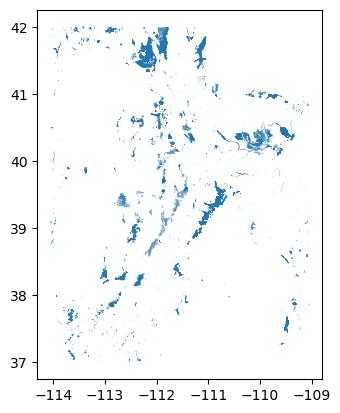

In [33]:
# plot shape info to map
gdfin1.plot()

In [34]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

columnsList = ['in_SiteNativeID', 'geometry']
goutdf1 = pd.DataFrame(columns=columnsList, index=gdfin1.index)

goutdf1['in_SiteNativeID'] =  gdfin1["in_SiteNativeID"].astype(str)  #in_ReportingUnitNativeID needs to match source from above equivalent dataframe
goutdf1['geometry'] = gdfin1['in_Geometry']
goutdf1 = goutdf1.drop_duplicates().reset_index(drop=True)

# drop geometery from outdf
outdf = outdf.drop(['in_Geometry'], axis=1)


print(len(goutdf1))
goutdf1.head()

70943


,in_SiteNativeID,geometry
0,u71165326,POLYGON ((-109.67400682599998 38.6551921380000...
1,u71165327,MULTIPOLYGON (((-109.68702320799997 38.6572431...
2,u71165328,POLYGON ((-109.28258513299994 38.8492926540000...
3,u71165329,MULTIPOLYGON (((-109.13126697599995 39.0728668...
4,u71165330,POLYGON ((-109.68839619599999 38.6797482610000...


## Export Data

In [35]:
outdf.info

<bound method DataFrame.info of        WaDEUUID in_MethodUUID in_VariableSpecificUUID in_OrganizationUUID  \
0          utD0       UTwr_M1                 UTwr_V1             UTwr_O1   
1          utD1       UTwr_M1                 UTwr_V1             UTwr_O1   
2          utD2       UTwr_M1                 UTwr_V1             UTwr_O1   
3          utD5       UTwr_M1                 UTwr_V1             UTwr_O1   
4          utD6       UTwr_M1                 UTwr_V1             UTwr_O1   
...         ...           ...                     ...                 ...   
484750   u70941       UTwr_M1                 UTwr_V1             UTwr_O1   
484751   u70941       UTwr_M1                 UTwr_V1             UTwr_O1   
484752   u70941       UTwr_M1                 UTwr_V1             UTwr_O1   
484753   u70941       UTwr_M1                 UTwr_V1             UTwr_O1   
484754   u70942       UTwr_M1                 UTwr_V1             UTwr_O1   

       in_GNISFeatureNameCV in_WaterQuality

In [36]:
outdf

,WaDEUUID,in_MethodUUID,in_VariableSpecificUUID,in_OrganizationUUID,in_GNISFeatureNameCV,in_WaterQualityIndicatorCV,in_WaterSourceName,in_WaterSourceNativeID,in_WaterSourceTypeCV,in_CoordinateAccuracy,in_CoordinateMethodCV,in_County,in_EPSGCodeCV,in_GNISCodeCV,in_HUC12,in_HUC8,in_Latitude,in_Longitude,in_NHDNetworkStatusCV,in_NHDProductCV,in_PODorPOUSite,in_SiteName,in_SiteNativeID,in_SitePoint,in_SiteTypeCV,in_StateCV,in_USGSSiteID,in_AllocationApplicationDate,in_AllocationAssociatedConsumptiveUseSiteIDs,in_AllocationAssociatedWithdrawalSiteIDs,in_AllocationBasisCV,in_AllocationChangeApplicationIndicator,in_AllocationCommunityWaterSupplySystem,in_AllocationCropDutyAmount,in_AllocationExpirationDate,in_AllocationFlow_CFS,in_AllocationLegalStatusCV,in_AllocationNativeID,in_AllocationOwner,in_AllocationPriorityDate,in_AllocationSDWISIdentifierCV,in_AllocationTimeframeEnd,in_AllocationTimeframeStart,in_AllocationTypeCV,in_AllocationVolume_AF,in_BeneficialUseCategory,in_CommunityWaterSupplySystem,in_CropTypeCV,in_CustomerTypeCV,in_DataPublicationDate,in_DataPublicationDOI,in_ExemptOfVolumeFlowPriority,in_GeneratedPowerCapacityMW,in_IrrigatedAcreage,in_IrrigationMethodCV,in_LegacyAllocationIDs,in_OwnerClassificationCV,in_PopulationServed,in_PowerType,in_PrimaryBeneficialUseCategory,in_SDWISIdentifierCV,in_WaterAllocationNativeURL
0,utD0,UTwr_M1,UTwr_V1,UTwr_O1,,,Non-Production Well Unknown,wadeID1,Underground,,,,4326,,,,37.62765,-109.47214,,,POD,NonProduction Well Unknown,d1042769722,,,UT,,,,,,,,,,,Approved,0009002M00,STANTEC CONSULTING INC,NaT,,,,,,,,,,,,0,,,,,,,,,,https://www.waterrights.utah.gov/search/?q=000...
1,utD1,UTwr_M1,UTwr_V1,UTwr_O1,,,Non-Production WellTest,wadeID2,Underground,,,,4326,,,,37.84186,-109.22851,,,POD,NonProduction WellTest,d1042769723,,,UT,,,,,,,,,,,Approved,0009002P00,ELDRED MIKE,NaT,,,,,,,,,,,,0,,,,,,,,,,https://www.waterrights.utah.gov/search/?q=000...
2,utD2,UTwr_M1,UTwr_V1,UTwr_O1,,,Underground Water Well,wadeID3,Underground,,,,4326,,,,41.63915,-111.90056,,,POD,Underground Water Well,d1042769724,,,UT,,,,,,,,,,0.02000,Certificated,25-9321,SCOTT LEISHMAN,1993-05-20,,,,,1.40000,"Domestic,Irrigation",,,,,,0,,,,,,,,,,https://www.waterrights.utah.gov/search/?q=25-...
3,utD5,UTwr_M1,UTwr_V1,UTwr_O1,,,Non-Production WellTest,wadeID2,Underground,,,,4326,,,,37.68382,-109.09374,,,POD,NonProduction WellTest,d1042769727,,,UT,,,,,,,,,,,Approved,0009003P00,ROGERS JARRED W AND NORMA L,NaT,,,,,,,,,,,,0,,,,,,,,,,https://www.waterrights.utah.gov/search/?q=000...
4,utD6,UTwr_M1,UTwr_V1,UTwr_O1,,,Non-Production Well Unknown,wadeID1,Underground,,,,4326,,,,40.73587,-114.03529,,,POD,NonProduction Well Unknown,d1042769728,,,UT,,,,,,,,,,,Approved,0015001M00,TOM JONES,NaT,,,,,,,,,,,,0,,,,,,,,,,https://www.waterrights.utah.gov/search/?q=001...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484750,u70941,UTwr_M1,UTwr_V1,UTwr_O1,,,Price River (Bryner-Ploutz Ditch),wadeID7842,Surface,,,,4326,,,,39.68989,-110.85945,,,POU,,u71236269,,,UT,,,,,,,,,,,,91-2754,,NaT,,,,,,,,,,,,0,,,,,,,,,,
484751,u70941,UTwr_M1,UTwr_V1,UTwr_O1,,,Price River (Bryner-Ploutz Ditch),wadeID7842,Surface,,,,4326,,,,39.68989,-110.85945,,,POU,,u71236269,,,UT,,,,,,,,,,,,91-2755,,NaT,,,,,,,,,,,,0,,,,,,,,,,
484752,u70941,UTwr_M1,UTwr_V1,UTwr_O1,,,Price River (Bryner-Ploutz Ditch),wadeID7842,Surface,,,,4326,,,,39.68989,-110.85945,,,POU,,u71236269,,,UT,,,,,,,,,,,,91-2756,,NaT,,,,,,,,,,,,0,,,,,,,,,,
484753,u70941,UTwr_M1,UTwr_V1,UTwr_O1,,,Price River (Bryner-Ploutz Ditch),wadeID7842,Surface,,,,4326,,,,39.68989,-110.85945,,,POU,,u71236269,,,UT,,,,,,,,,,,,91-2757,,NaT,,,,,,,,,,,,0,,,,,,,,,,


In [37]:
# Export the output dataframe
outdf.to_csv('RawInputData/Pwr_Main.zip', compression=dict(method='zip', archive_name='Pwr_Main.csv'), index=False)  # The output, save as a zip
goutdf1.to_csv('RawInputData/P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.